In [1]:
import csv
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

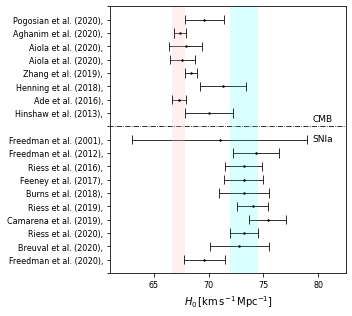

In [6]:
black = [0,0,0]
red   = [1,0,0]
blue  = [0,0,1]

#+++++++++++++++++++++++++++++
from matplotlib import rcParams
config = {
	"mathtext.fontset":'dejavusans'
	}
rcParams.update(config)
#+++++++++++++++++++++++++++++

class ErrorLinePloter:
    def __init__(self,data,position):
        self.data = data
        self.position = position

# Horizontal line
        self.hlwidth = 0.8
        self.hlstyle = '-'
        self.hlcolor = red

# Point props
        self.point_size = 0.34
        self.point_color = blue
        self.point_lwidth = 0.8 
        
        self.middle_point_type = 'line'
        self.middle_point_size=self.point_size
        self.middle_point_color=self.point_color

        self.middle_point_lwidth=self.point_lwidth
        self.middle_point_mshape='o'

    def set_props(self,hlwidth,hlstyle,hlcolor,
                    psize,pcolor,pwidth,
                    middle_point_type='line',
                    **lmprop):

        self.hlwidth=hlwidth
        self.hlstyle=hlstyle
        self.hlcolor=hlcolor
        self.point_size = psize
        self.point_color = pcolor
        self.point_lwidth = pwidth
        
        self.middle_point_size = psize
        self.middle_point_color= pcolor
        self.middle_point_type=middle_point_type
        if middle_point_type == 'line':
            if len(lmprop)!=0:
                self.middle_point_size=lmprop['mpsize']
                self.middle_point_color=lmprop['mpcolor']
                self.middle_point_lwidth=lmprop['lwidth']
        elif middle_point_type == 'marker':
            if len(lmprop)!=0:
                self.middle_point_size=lmprop['mpsize']
                self.middle_point_color=lmprop['mpcolor']
                self.middle_point_mshape=lmprop['mshape']

    def plot(self):
        list_3=[self.data['ml']+self.data['e1_sig'][0],
                self.data['ml'],
                self.data['ml']+self.data['e1_sig'][1]]
        
        plt.hlines(y=self.position,xmin=list_3[0],xmax=list_3[-1],color=self.hlcolor,ls=self.hlstyle,lw=self.hlwidth,zorder=1)
        plt.vlines(x=[list_3[0],list_3[-1]],
                    ymin=self.position-self.point_size/2,
                    ymax=self.position+self.point_size/2,
                    color=self.point_color,
                    ls='-',
                    lw=self.point_lwidth,
                    zorder=2)

        if self.middle_point_type == 'line':
            plt.vlines(x=list_3[1],
                    ymin=self.position-self.middle_point_size/2,
                    ymax=self.position+self.middle_point_size/2,
                    color=self.middle_point_color,
                    ls='-',
                    lw=self.middle_point_lwidth,
                    zorder=3)
        elif self.middle_point_type == 'marker':
            plt.scatter(list_3[1],self.position,
                    s=self.middle_point_size,
                    color=self.middle_point_color,
                    marker=self.middle_point_mshape,
                    zorder=3)
        else:
            print("Error: Invalid middle point type.")
            sys.exit()

### Repository containing the .csv with the dataset
### See README for more info on the structure

#data_path = "../data/"
#fil = data_path+'dataset.csv'
#fil = 'dataset.csv'
fil = 'dataset-Copy1.csv'

### Load the dataset and count the number of data points
nr=1
with open(fil, 'r+') as file:
    reader = csv.reader(file)
    first_line = file.readline()
    next(reader, None)
    for row in reader:
        nr += 1
    nc = first_line.count(',')+1

### Load the data points into arrays
H0 = np.zeros(nr)
Hl = np.zeros(nr)
Hp = np.zeros(nr)
method = ["" for x in range(nr)]
lbl    = ["" for x in range(nr)]
auth   = ["" for x in range(nr)]
etal   = ["" for x in range(nr)]
year   = ["" for x in range(nr)]
set    = ["" for x in range(nr)]

i=0
with open(fil, 'r+') as file:
    reader = csv.reader(file)
    next(reader, None)
    for row in reader:
        method[i] = row[0]
        lbl[i]    = row[1]
        auth[i]   = row[2]
        etal[i]   = row[3]
        year[i]   = row[4]
        set[i]    = row[5]
        H0[i] = float(row[6])
        Hl[i] = float(row[7])
        Hp[i] = float(row[8])
        i += 1

### Count the number of indirect measures
nind=0
for i in range(nr):
    if method[i]=='Indirect':
        nind += 1

#---------------------------label-------------------------------------
aut = ["" for x in range(nr)]
for i in range(nr):
    if etal[i]=='Y':
      aut[i] = auth[i]+' et al. ('+str(year[i])+'),'
    else:
      aut[i] = auth[i]+' ('+str(year[i])+'),'

paras=[]
for i in range(nr):
    if Hl[i]==Hp[i]:
        paras.append(aut[i])#+str(H0[i])+'${\pm}$'+str(Hp[i]))
    else:
        paras.append(aut[i])#+str(H0[i])+'$^{+'+str(Hp[i])+'}_{-'+str(Hl[i])+'}$')

#---------------------------data-------------------------------------
all_data = []
for i in range(nr):
    all_data.append({'ml':H0[i],'e1_sig':[Hp[i],-Hl[i]]})

#---------------------------style-------------------------------------
pos_num = nr

positions=[]
labels=[]
for i in range(pos_num+3):
    positions.append(i)
    labels.append('')

unique_labels=[]
unique_pos=[]

#---------------------------plot-------------------------------------#
pdf = PdfPages('H0whisker.pdf')

plt.rcParams['figure.figsize'] = (5,4.5)

plt.text(79.5,nr-nind+1.4,"CMB",size=9)
plt.text(79.5,nr-nind-0.1,"SNIa",size=9)
#plt.text(74.7,nr,"${H_0}\,$[km$\,$s$^{-1}\,$Mpc$^{-1}$]",size=9)

### Plot the vertical bars for reference: R20 vs CMB
plt.bar(73.2, 100, width=2.6, facecolor = 'cyan', alpha = 0.15)
plt.bar(67.27, 100, width=1.2, facecolor = 'pink', alpha = 0.25)

### Plot each data point with attached label
j=0
k=nind
for i in range(len(paras)):
    if method[i]=='Indirect':
      elp = ErrorLinePloter(all_data[i],position=nr-j+1)
      j += 1
    elif method[i]=='Direct':
      elp = ErrorLinePloter(all_data[i],position=nr-k)
      k += 1
    labels[elp.position]=paras[i]
    elp.set_props(0.8,'-',black,
          0.7,black,0.8,
          'marker',mpsize=2.0,mpcolor=black,mshape='o')
    elp.plot()

elp = ErrorLinePloter({'ml':0.0,'e1_sig':[100.,-100.]},position=nr-nind+1)
labels[elp.position]=''
elp.set_props(0.8,'-.',black,
       0.7,black,0.8,
        'marker',mpsize=2.0,mpcolor=black,mshape='o')
elp.plot()

plt.tick_params(axis='x',labelsize=8)
plt.tick_params(axis='y',labelsize=8)
plt.xticks([i for i in range(60,100,5)])#,fontweight='semibold')
plt.xlabel("${H_0}\,$[km$\,$s$^{-1}\,$Mpc$^{-1}$]")

plt.xlim(61,82.5)

plt.ylim(positions[0],positions[-1])

plt.yticks(positions,labels)#,fontweight='semibold')

plt.tight_layout()
pdf.savefig()
pdf.close()